In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from latexify import latexify
# latexify(columns = 2)
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
import ipywidgets as widgets
from ipywidgets import interactive

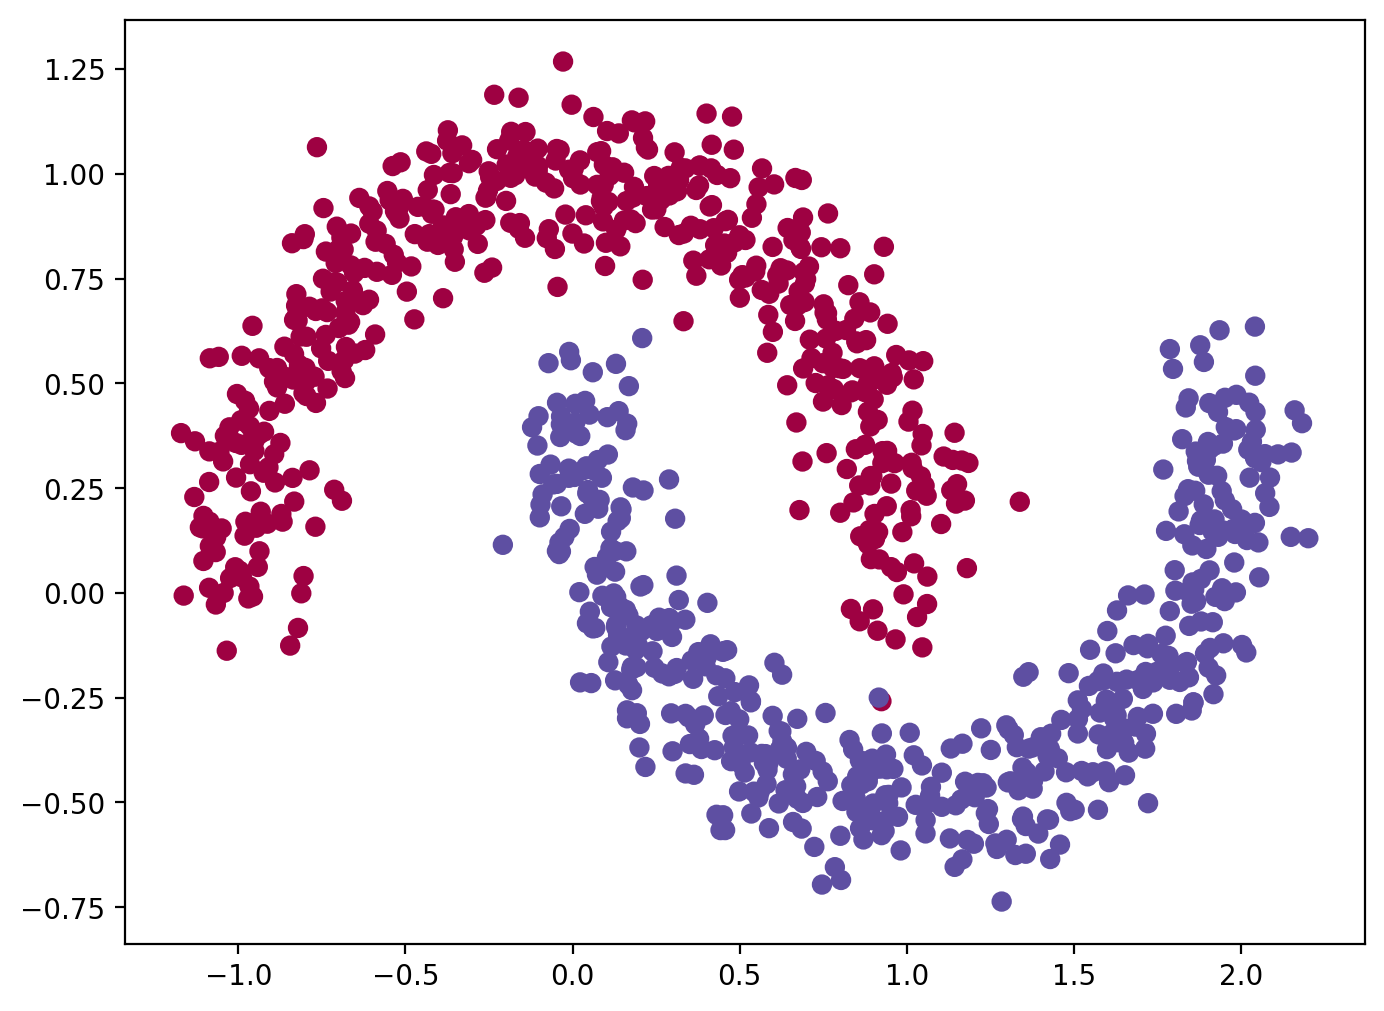

In [3]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 1000, noise = 0.1, random_state = 0)

plt.figure(figsize = (8, 6))
plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.Spectral);
plt.show()

In [4]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(X, y)

RandomForestClassifier(random_state=0)

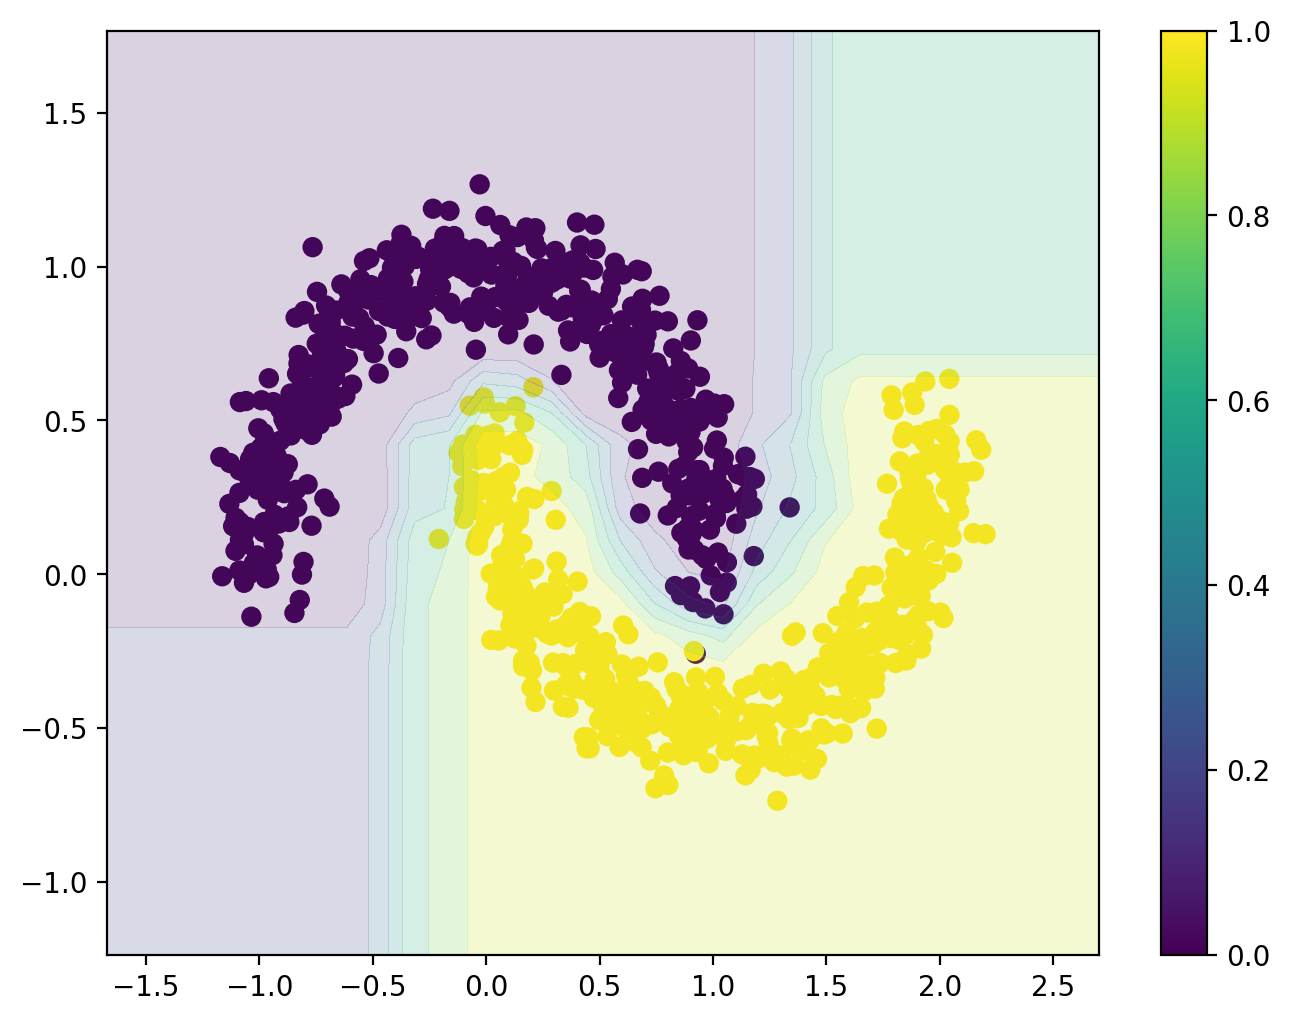

In [5]:
# Decision surface
plt.figure(figsize = (8, 6))
plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.viridis)
ax = plt.gca()
xlim = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
ylim = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

# Create grid to evaluate model
x_lin = np.linspace(xlim[0], xlim[1], 30)
y_lin = np.linspace(ylim[0], ylim[1], 30)

XX, YY = np.meshgrid(x_lin, y_lin)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = rf.predict_proba(xy)[:, 1].reshape(XX.shape)

# Plot decision boundary
ax.contourf(XX, YY, Z, cmap = plt.cm.viridis, alpha = 0.2)
plt.colorbar()
plt.show()

In [6]:
X_arr = np.array([1, 2, 3, 4])
Y_arr = np.array([5, 6, 7])

XX, YY = np.meshgrid(X_arr, Y_arr)

In [7]:
XX

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [8]:
YY

array([[5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7]])

In [9]:
XX.shape, YY.shape

((3, 4), (3, 4))

In [10]:
out = {}
count = 0
for i in range(XX.shape[0]):
    for j in range(XX.shape[1]):
        count = count + 1
        out[count] = {"i": i, "j": j, "XX": XX[i, j], "YY": YY[i, j]}

In [11]:
pd.DataFrame(out).T

,i,j,XX,YY
1,0,0,1,5
2,0,1,2,5
3,0,2,3,5
4,0,3,4,5
5,1,0,1,6
6,1,1,2,6
7,1,2,3,6
8,1,3,4,6
9,2,0,1,7
10,2,1,2,7


In [12]:
XX[0], YY[0]

(array([1, 2, 3, 4]), array([5, 5, 5, 5]))

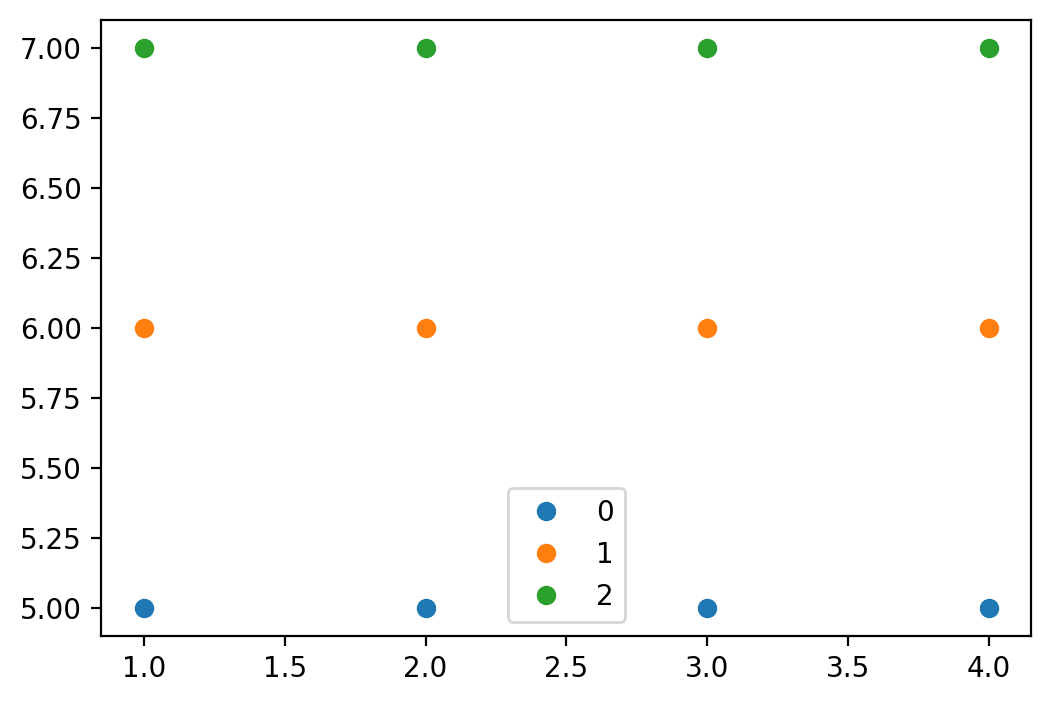

In [13]:
plt.figure(figsize = (6, 4))
for i in range(XX.shape[0]):
    plt.plot(XX[i], YY[i], 'o', label=i)
plt.legend();

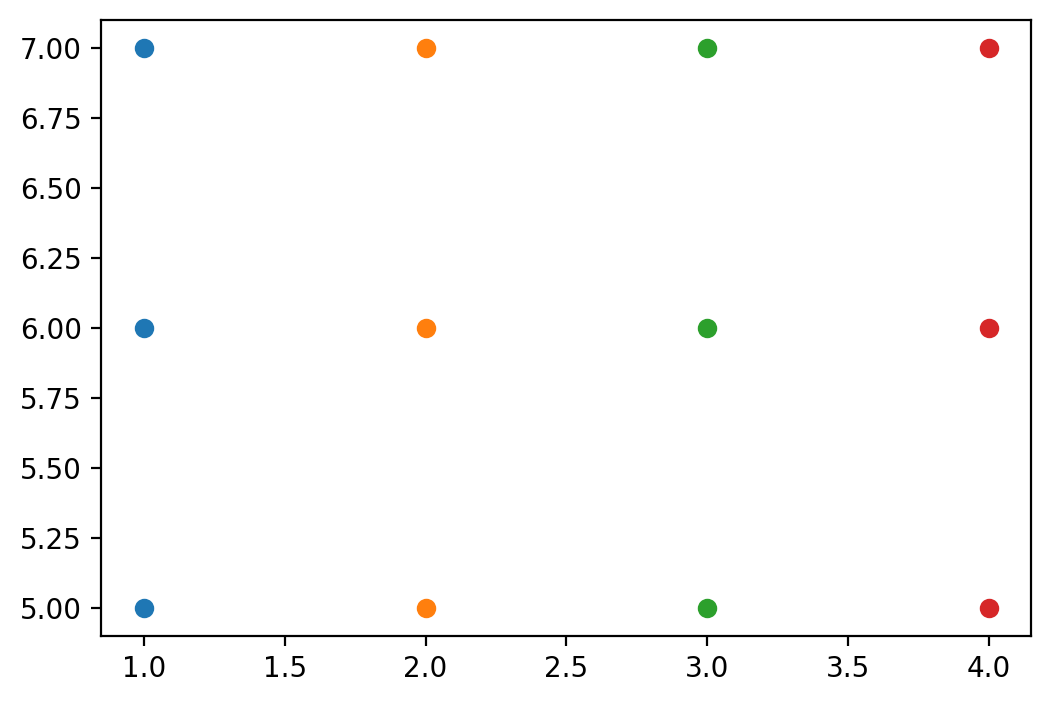

In [14]:
plt.figure(figsize = (6, 4))
plt.plot(XX, YY, 'o')
plt.show()

### Let's see some Plots and their Contours

* $$ \color{red}{F(x, y) = \sin(x)\cos(y)}, -\frac{3\pi}{2} \le x \le \frac{3\pi}{2}, -\pi \le y \le \pi $$

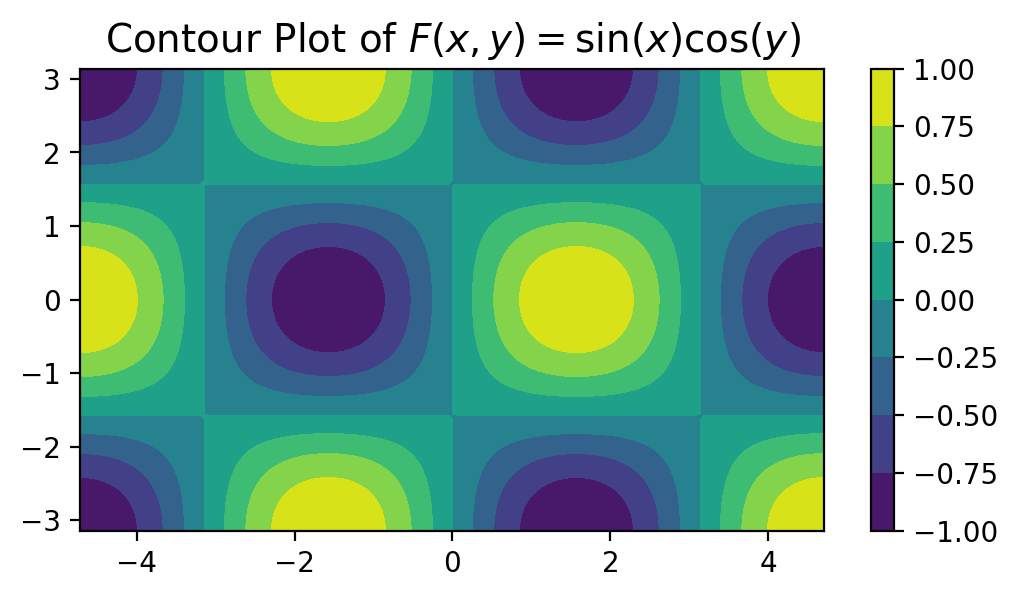

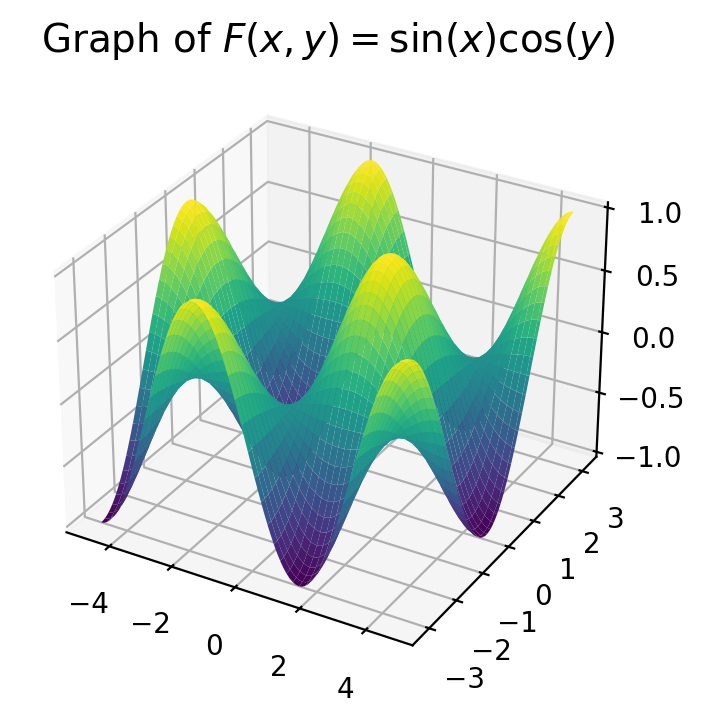

In [15]:
from mpl_toolkits.mplot3d import Axes3D

X1 = np.linspace(-3/2 * np.pi, 3/2 * np.pi, 100)
Y1 = np.linspace(-np.pi, np.pi, 100)
XX1, YY1 = np.meshgrid(X1, Y1)
F = np.sin(XX1) * np.cos(YY1)


plt.figure(figsize=(6, 3))
plt.contourf(XX1, YY1, F, cmap = "viridis")
plt.colorbar()
plt.title(r"Contour Plot of $F(x, y) = \sin(x)\cos(y)$", fontsize = 14)
plt.show()


fig = plt.figure(figsize=(8, 4))
ax4 = fig.add_subplot(111, projection = "3d")
ax4.plot_surface(XX1, YY1, F, cmap = "viridis")
ax4.set_title(r"Graph of $F(x, y) = \sin(x)\cos(y)$", fontsize = 14)
plt.show()

In [16]:
xlim = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
ylim = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

# Create grid to evaluate model
x_lin = np.linspace(xlim[0], xlim[1], 30)
y_lin = np.linspace(ylim[0], ylim[1], 30)

In [17]:
x_lin

array([-1.67150293, -1.52070662, -1.36991031, -1.219114  , -1.06831769,
       -0.91752137, -0.76672506, -0.61592875, -0.46513244, -0.31433613,
       -0.16353982, -0.01274351,  0.1380528 ,  0.28884911,  0.43964542,
        0.59044173,  0.74123804,  0.89203435,  1.04283066,  1.19362697,
        1.34442328,  1.49521959,  1.6460159 ,  1.79681221,  1.94760852,
        2.09840483,  2.24920114,  2.39999745,  2.55079376,  2.70159007])

In [18]:
XX, YY = np.meshgrid(x_lin, y_lin)

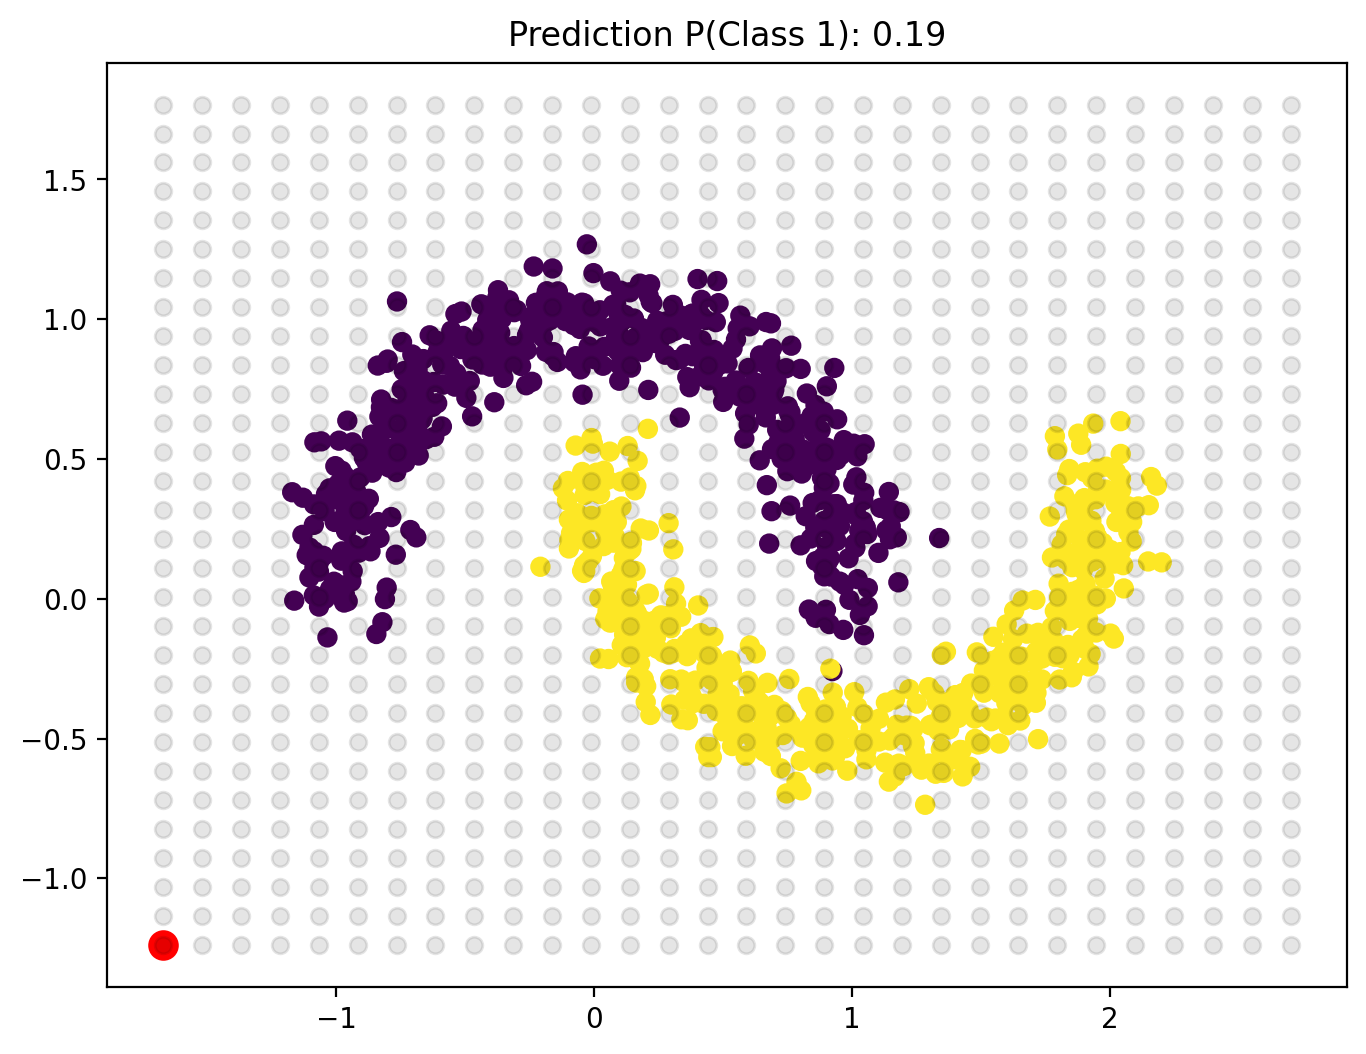

In [19]:
def update_plot(i = 0, j = 2):
    x_point = XX[i, j]
    y_point = YY[i, j]

    plt.figure(figsize = (8, 6))
    plt.plot(XX, YY, 'o', alpha = 0.1, color = 'k')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.viridis)

    pred = rf.predict_proba([[x_point, y_point]])[:, 1]

    plt.scatter(x_point, y_point, s = 100, c = "r")
    plt.title(f"Prediction P(Class 1): {pred[0]:.2f}")
    plt.show()

update_plot(0, 0)

In [20]:
widget = interactive(update_plot, i = (0, XX.shape[0] - 1), j = (0, XX.shape[1] - 1))
display(widget)

interactive(children=(IntSlider(value=0, description='i', max=29), IntSlider(value=2, description='j', max=29)…

In [21]:
XX[0], YY[:, 0]

(array([-1.67150293, -1.52070662, -1.36991031, -1.219114  , -1.06831769,
        -0.91752137, -0.76672506, -0.61592875, -0.46513244, -0.31433613,
        -0.16353982, -0.01274351,  0.1380528 ,  0.28884911,  0.43964542,
         0.59044173,  0.74123804,  0.89203435,  1.04283066,  1.19362697,
         1.34442328,  1.49521959,  1.6460159 ,  1.79681221,  1.94760852,
         2.09840483,  2.24920114,  2.39999745,  2.55079376,  2.70159007]),
 array([-1.23673767, -1.13313159, -1.02952551, -0.92591943, -0.82231335,
        -0.71870727, -0.61510119, -0.51149511, -0.40788903, -0.30428295,
        -0.20067687, -0.09707079,  0.00653529,  0.11014137,  0.21374745,
         0.31735353,  0.42095961,  0.52456569,  0.62817177,  0.73177785,
         0.83538393,  0.93899001,  1.04259609,  1.14620217,  1.24980825,
         1.35341433,  1.45702041,  1.56062649,  1.66423257,  1.76783865]))

In [22]:
XX.shape

(30, 30)

In [23]:
from einops import rearrange, repeat, reduce

Usually when dealing with images, the shapes are of the form $(B \times C \times H \times W)$ where <br>
$B$: Batch Size <br>
$C$: Number of Image Channels <br>
$H$: Image Height <br>
$W$: Image Width <br>
Inorder to flatten the image data into a linear array $(B \times C \times H \times W) \to (B \times C \cdot H \cdot W)$, we may use <br>
$$ \texttt{einops.rearrange(img, "b c h w -> b (c h w)")} $$

In [24]:
XX.shape

(30, 30)

In [25]:
XX.ravel().shape

(900,)

In [26]:
rearrange(XX, 'i j -> (i j) 1').shape, rearrange(XX, 'i j -> (i j)').shape

((900, 1), (900,))

In [27]:
rearrange(YY, 'i j -> (i j) 1').shape

(900, 1)

In [28]:
XX_flat = rearrange(XX, 'i j -> (i j) 1')
YY_flat = rearrange(YY, 'i j -> (i j) 1')

In [29]:
np.array([XX_flat, YY_flat]).shape

(2, 900, 1)

In [30]:
rearrange([XX_flat, YY_flat], 'f n 1 -> n f').shape

(900, 2)

In [31]:
X_feature = rearrange([XX_flat, YY_flat], 'f n 1 -> n f')

In [32]:
X_feature[:32]

array([[-1.67150293, -1.23673767],
       [-1.52070662, -1.23673767],
       [-1.36991031, -1.23673767],
       [-1.219114  , -1.23673767],
       [-1.06831769, -1.23673767],
       [-0.91752137, -1.23673767],
       [-0.76672506, -1.23673767],
       [-0.61592875, -1.23673767],
       [-0.46513244, -1.23673767],
       [-0.31433613, -1.23673767],
       [-0.16353982, -1.23673767],
       [-0.01274351, -1.23673767],
       [ 0.1380528 , -1.23673767],
       [ 0.28884911, -1.23673767],
       [ 0.43964542, -1.23673767],
       [ 0.59044173, -1.23673767],
       [ 0.74123804, -1.23673767],
       [ 0.89203435, -1.23673767],
       [ 1.04283066, -1.23673767],
       [ 1.19362697, -1.23673767],
       [ 1.34442328, -1.23673767],
       [ 1.49521959, -1.23673767],
       [ 1.6460159 , -1.23673767],
       [ 1.79681221, -1.23673767],
       [ 1.94760852, -1.23673767],
       [ 2.09840483, -1.23673767],
       [ 2.24920114, -1.23673767],
       [ 2.39999745, -1.23673767],
       [ 2.55079376,

In [33]:
Z = rf.predict_proba(X_feature)[:, 1]

In [34]:
Z.shape

(900,)

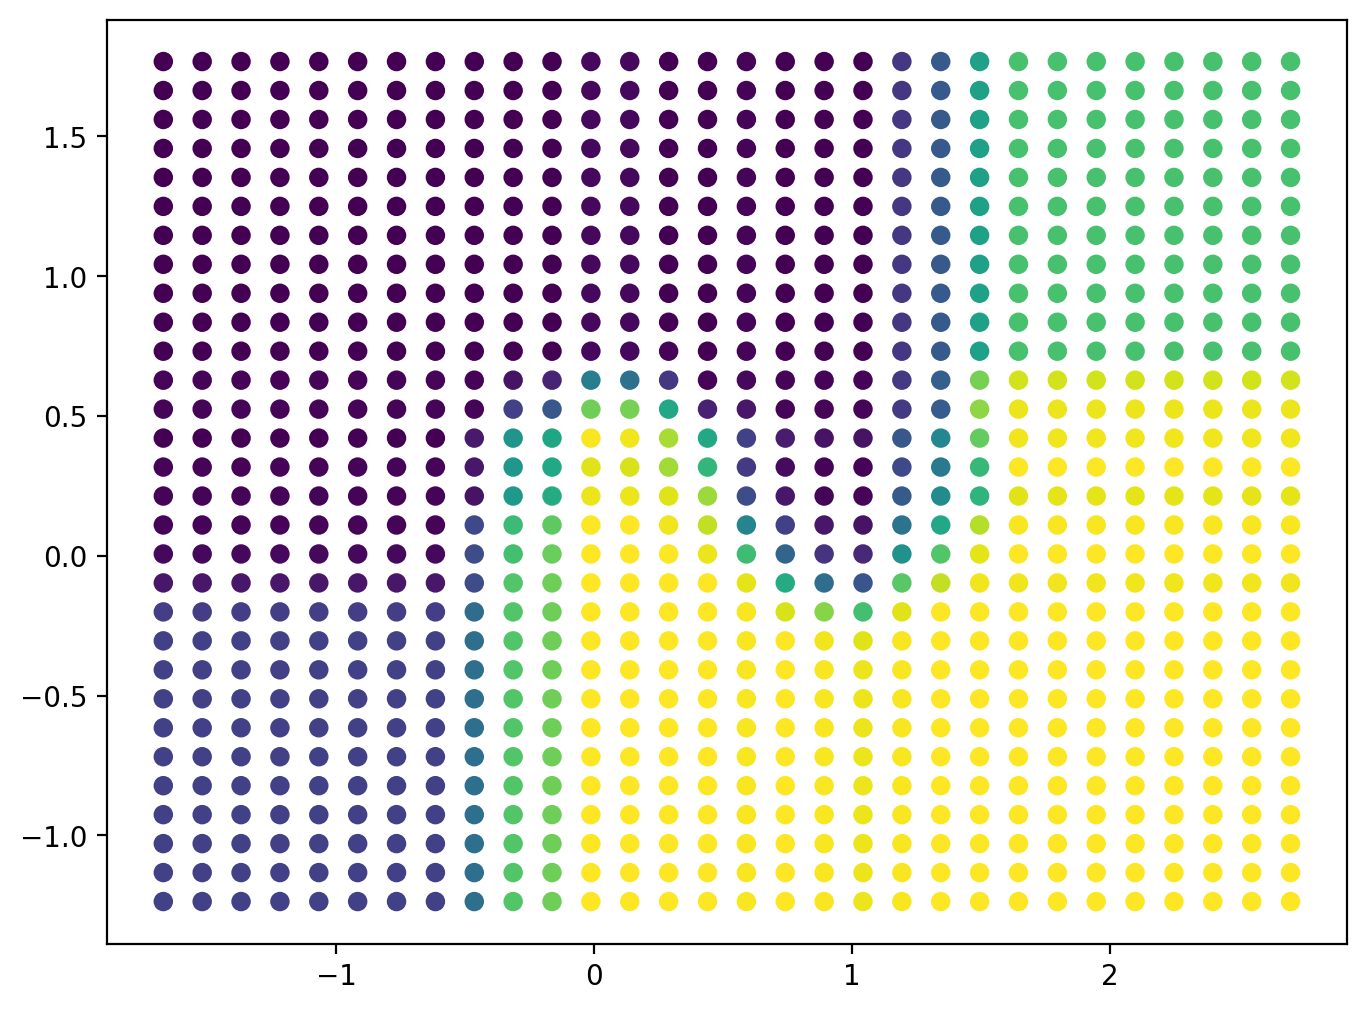

In [35]:
plt.figure(figsize = (8, 6))
plt.scatter(XX_flat, YY_flat, c = Z, cmap = plt.cm.viridis)
plt.show()

In [36]:
Z[:10]

array([0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.36, 0.73])

In [37]:
# Divide Z into k levels
k = 10
min_Z = Z.min()
max_Z = Z.max()

levels = np.linspace(min_Z, max_Z, k)

levels

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

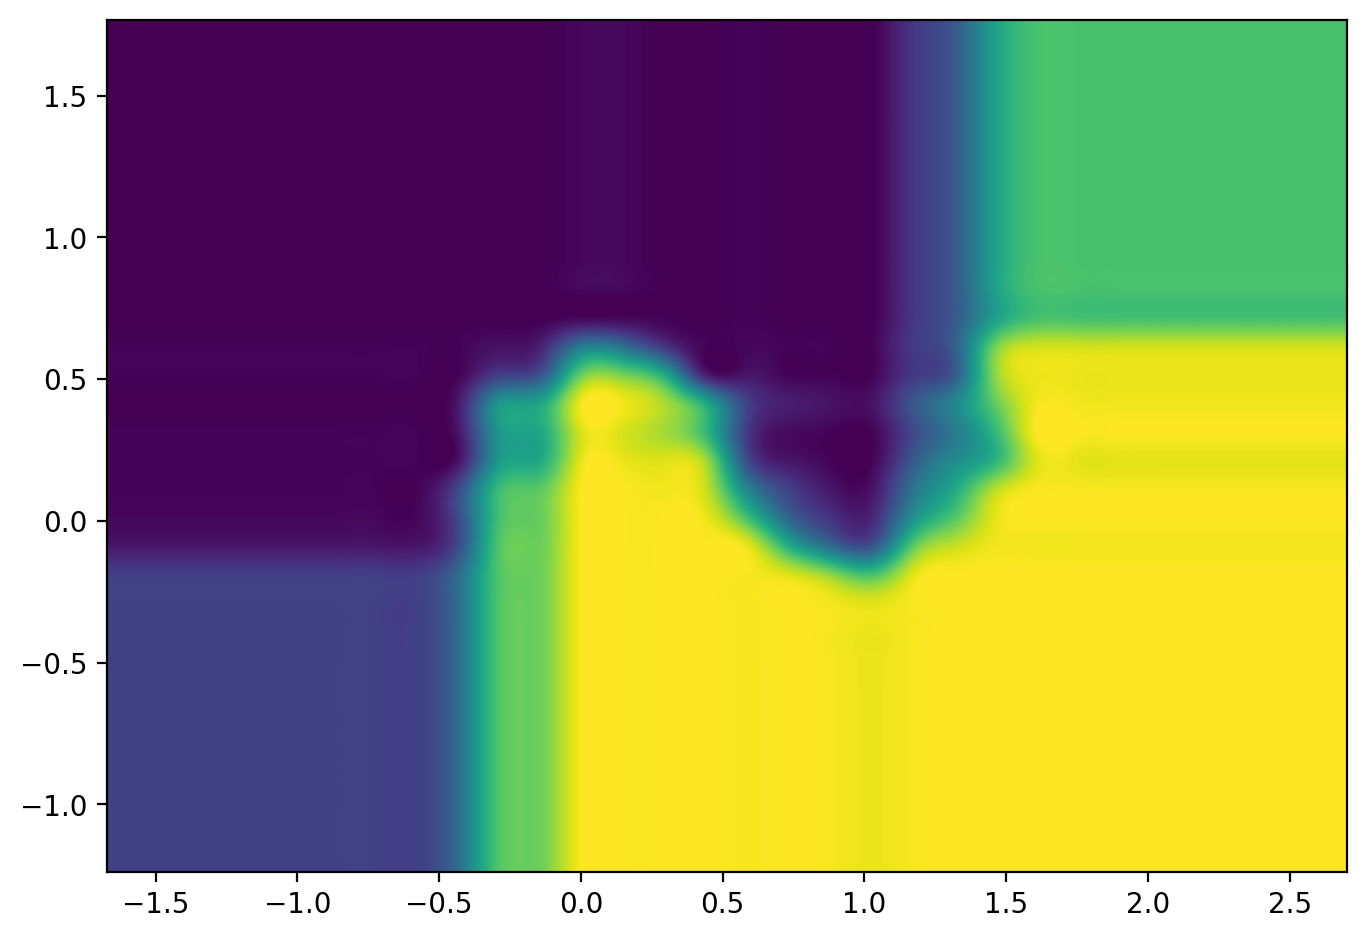

In [38]:
# Create an image from Z 
img = rearrange(Z, '(h w) -> h w', h=XX.shape[0])
plt.figure(figsize = (8, 6))
plt.imshow(img, cmap=plt.cm.viridis, 
           extent=[XX.min(), XX.max(), YY.min(), YY.max()], 
           origin='lower',
           interpolation='spline36')

plt.show()

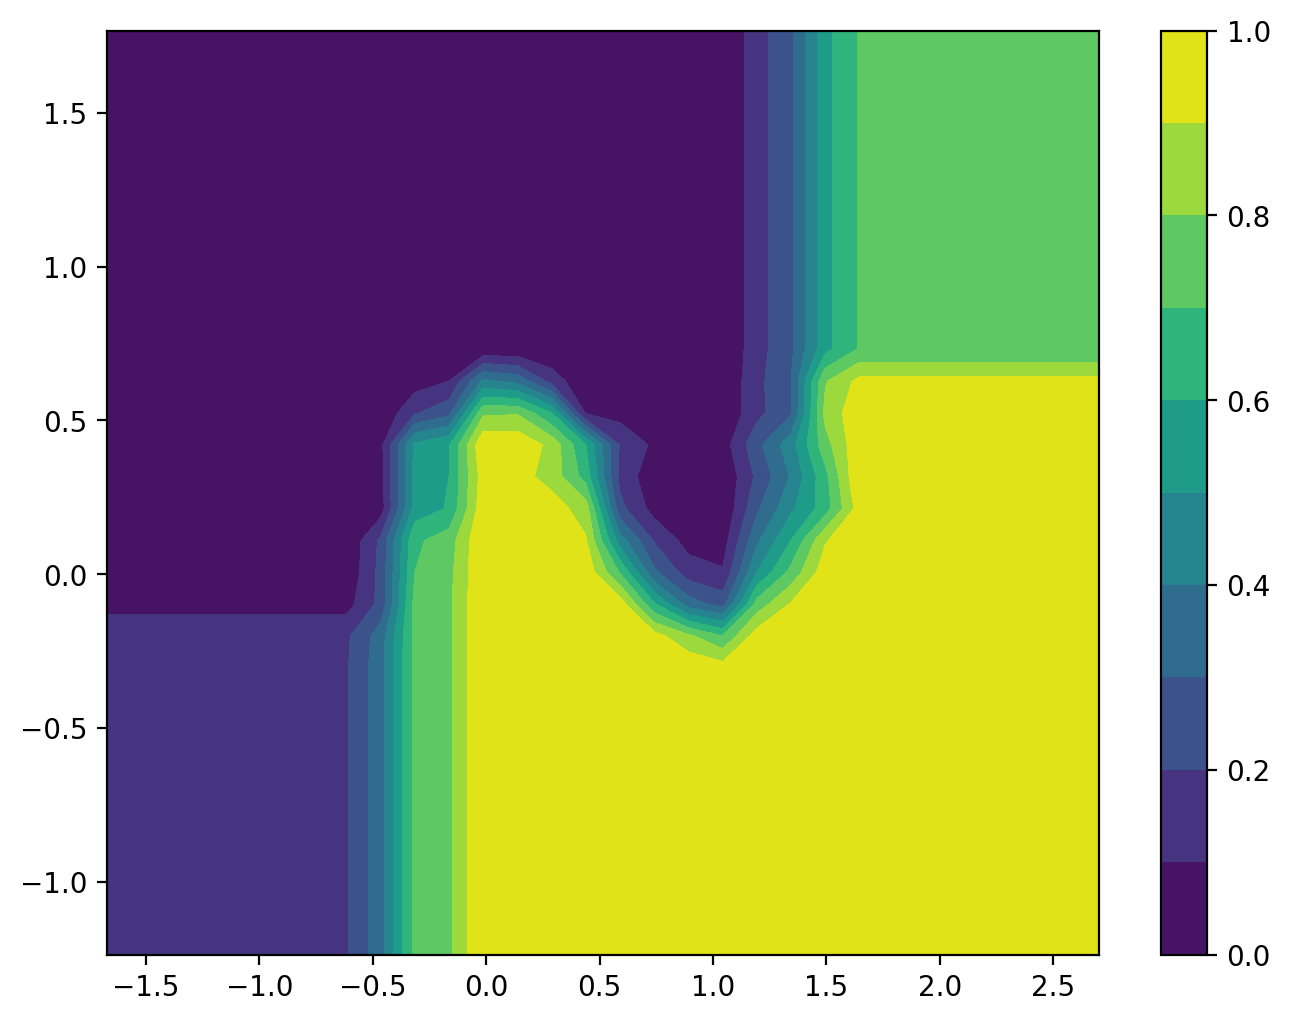

In [39]:
plt.figure(figsize = (8, 6))
plt.contourf(XX, YY, Z.reshape(XX.shape), cmap=plt.cm.viridis, levels=10);
plt.colorbar()
plt.show()